INTRODUCTION

In this tutorial, we walk through a beginning data science example for classification.  We cover many basics here, starting from obtaining our dataset, data visualization, and data preprocessing, to training and testing of our classifiers.  We use the Iris dataset (a common dataset for beginners), and use SVM and Neural Networks for classification.

The Iris dataset contains four measurements of three classes of flowers.  50 samples were measured for each class, were the features measured are the length and width of the petals, and the length and width of the sepal.  The three flower classes are iris-setosa, iris-versicolor, and iris-virginica.  This dataset will allow us to build classifiers that can predict the class of an unseen iris flower based purely on these four measurements.

Note:  To run the code in the Jupyter Notebook cell, make sure you are inside the frame and press ctrl+enter.  Press Esc to "exit" a cell.

First we obtain our dataset.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

Below, we take our data and place it into a pandas dataframe.  This is quite the useful way to explore your data as we will see.  We also include commented out code for reading a csv file into a dataframe.

In [2]:
import pandas as pd
import numpy as np

#csv_data = pd.read_csv("iris_training.csv")
panda_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                          columns= iris['feature_names'] + ['target'])

To get an idea of the data we are working with, we can run the following code.  The first four column headers are the features of the flowers, and fifth column header is the "true class" of the flower (0 though 2).

In [3]:
panda_data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

Now we can "see" some of the differences between the classes. For clarity, 0 is for iris-setosa, 1 is for iris-versicolor, 2 is for iris-virginica. If we would like to look at a specific feature (and class), we may run the following

In [4]:
pd.set_option('display.max_rows',150)
panda_data[['petal length (cm)', 'target']]

petal length (cm)  target
0                  1.4     0.0
1                  1.4     0.0
2                  1.3     0.0
3                  1.5     0.0
4                  1.4     0.0
5                  1.7     0.0
6                  1.4     0.0
7                  1.5     0.0
8                  1.4     0.0
9                  1.5     0.0
10                 1.5     0.0
11                 1.6     0.0
12                 1.4     0.0
13                 1.1     0.0
14                 1.2     0.0
15                 1.5     0.0
16                 1.3     0.0
17                 1.4     0.0
18                 1.7     0.0
19                 1.5     0.0
20                 1.7     0.0
21                 1.5     0.0
22                 1.0     0.0
23                 1.7     0.0
24                 1.9     0.0
25                 1.6     0.0
26                 1.6     0.0
27                 1.5     0.0
28                 1.4     0.0
29                 1.6     0.0
30                 1.6     0.0
31                 1.5     0.0
32                 1.5     0.0
33                 1.4     0.0
34                 1.5     0.0
35                 1.2     0.0
36                 1.3     0.0
37                 1.5     0.0
38                 1.3     0.0
39                 1.5     0.0
40                 1.3     0.0
41                 1.3     0.0
42                 1.3     0.0
43                 1.6     0.0
44                 1.9     0.0
45                 1.4     0.0
46                 1.6     0.0
47                 1.4     0.0
48                 1.5     0.0
49                 1.4     0.0
50                 4.7     1.0
51                 4.5     1.0
52                 4.9     1.0
53                 4.0     1.0
54                 4.6     1.0
55                 4.5     1.0
56                 4.7     1.0
57                 3.3     1.0
58                 4.6     1.0
59                 3.9     1.0
60                 3.5     1.0
61                 4.2     1.0
62                 4.0     1.0
63                 4.7     1.0
64                 3.6     1.0
65                 4.4     1.0
66                 4.5     1.0
67                 4.1     1.0
68                 4.5     1.0
69                 3.9     1.0
70                 4.8     1.0
71                 4.0     1.0
72                 4.9     1.0
73                 4.7     1.0
74                 4.3     1.0
75                 4.4     1.0
76                 4.8     1.0
77                 5.0     1.0
78                 4.5     1.0
79                 3.5     1.0
80                 3.8     1.0
81                 3.7     1.0
82                 3.9     1.0
83                 5.1     1.0
84                 4.5     1.0
85                 4.5     1.0
86                 4.7     1.0
87                 4.4     1.0
88                 4.1     1.0
89                 4.0     1.0
90                 4.4     1.0
91                 4.6     1.0
92                 4.0     1.0
93                 3.3     1.0
94                 4.2     1.0
95                 4.2     1.0
96                 4.2     1.0
97                 4.3     1.0
98                 3.0     1.0
99                 4.1     1.0
100                6.0     2.0
101                5.1     2.0
102                5.9     2.0
103                5.6     2.0
104                5.8     2.0
105                6.6     2.0
106                4.5     2.0
107                6.3     2.0
108                5.8     2.0
109                6.1     2.0
110                5.1     2.0
111                5.3     2.0
112                5.5     2.0
113                5.0     2.0
114                5.1     2.0
115                5.3     2.0
116                5.5     2.0
117                6.7     2.0
118                6.9     2.0
119                5.0     2.0
120                5.7     2.0
121                4.9     2.0
122                6.7     2.0
123                4.9     2.0
124                5.7     2.0
125                6.0     2.0
126                4.8     2.0
127                4.9     2.0
128   

Currently all of our samples are grouped together by class.  We can shuffle the samples by running the following.

In [5]:
panda_data = panda_data.sample(frac=1).reset_index(drop=True)
panda_data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.3               2.7                4.9               1.8   
1                5.4               3.9                1.7               0.4   
2                5.7               2.8                4.5               1.3   
3                5.1               3.5                1.4               0.3   
4                7.4               2.8                6.1               1.9   

   target  
0     2.0  
1     0.0  
2     1.0  
3     0.0  
4     2.0

To obtain some basic statistics about our dataset, such as the average and standard deviation for each feature, we can run the following.

In [6]:
#Basic Statistics About Your data
panda_data.describe(include = 'all')

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

At this point, we have seen enough of our dataset, let's look at some graphs.  We begin with some histograms to visualize how our samples are distributed with respect to specific features.

In [7]:
#If the histograms do not display, try running it again.
import matplotlib.pyplot as plt

panda_data.hist()
plt.show()

<Figure size 640x480 with 6 Axes>

We can also look at the historgrams individually.

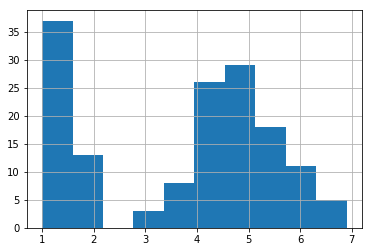

In [8]:
panda_data['petal length (cm)'].hist()
plt.show()

Now lets see how the features relate to each other with some cartesian plots.    

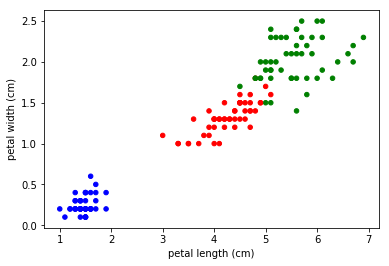

In [9]:
#For getting class colors.
col = panda_data['target'].map({0:'b', 1:'r', 2:'g'})
panda_data.plot(x = 'petal length (cm)', y = 'petal width (cm)', kind = 'scatter', c = col)
plt.show()

Petal length and width are highly correlated!  This is a sign of redundant information.  This can be useful when trying to reduce the number of features we use (as we will see later).

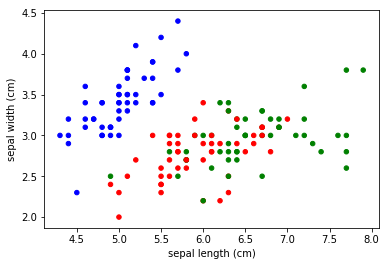

In [10]:
panda_data.plot(x = 'sepal length (cm)', y = 'sepal width (cm)', kind = 'scatter', c = col)
plt.show()

On the otherhand, sepal length and width do not appear to have much correlation.  We can investigate any combination of features we like.

To get a quick overview of feature correlations and feature histograms, we may perform the following.

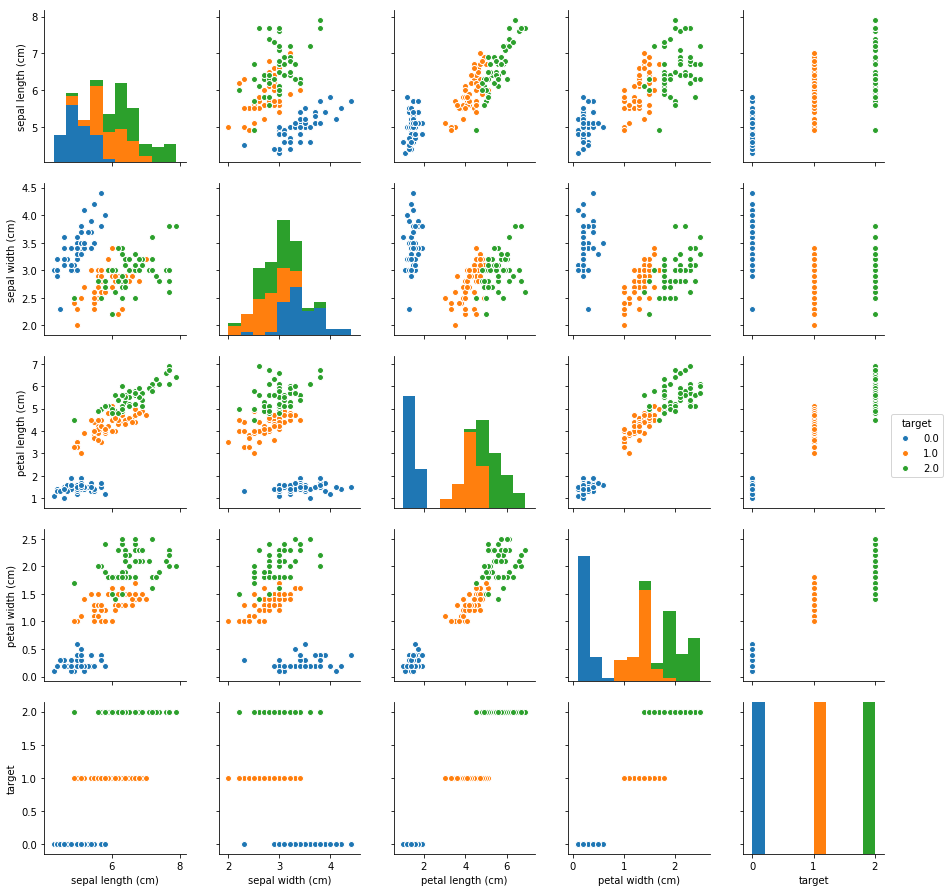

In [11]:
import seaborn as sns

#seaborn has better visualizations
sns.pairplot(panda_data, hue='target')

Okay, let's just try to use all our given features (without really considering how useful they are) to build a classification model.  We will be using SVM and Neural Networks.

We start with SVM.  We begin with a one time test.  Four-fifths of the data will be used for training  and one-fifth will be used for testing our model.  We use parameters such that we can seperate highly nonlinear data (kernel=rbf, aka Radial Basis Function).

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import svm


#X for the features, y for the classes.
X_train, X_test, y_train, y_test = train_test_split(panda_data[panda_data.columns[0:4]], panda_data['target'], test_size=0.2)

classifier = svm.SVC(kernel='rbf')

svm_model = classifier.fit(X_train, y_train)

And we now have a trained our model!  Let's look at how well it performed.  Confusion matrices are often used to show the true positives and false positives per class.  We can use our test data and compare it to how well it performed against the true classes for each flower.  The diagonal shows the true positives, the and other entries show false positives.

In [13]:
from sklearn.metrics import confusion_matrix
prediction = svm_model.predict(X_test)
confusion_matrix(y_test, prediction)

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 11]], dtype=int64)

But we can make it prettier, and include extra information such as class labels and accuracy.  First we declare the method below and run it with our true class data, prediction data, and labels.

Note: The pretty confusion matrix came from this useful tutorial about image classification by Eryk Lewinson.

https://towardsdatascience.com/mario-vs-wario-image-classification-in-python-ae8d10ac6d63

In [14]:
from sklearn import metrics

def pretty_cm(y_pred, y_truth, labels):
    # pretty implementation of a confusion matrix
    cm = metrics.confusion_matrix(y_truth, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
    # labels, title and ticks
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')
    ax.set_title('Accuracy: {0}'.format(metrics.accuracy_score(y_truth, y_pred)), size = 15) 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

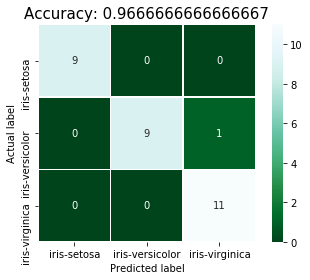

In [15]:
pretty_cm(prediction, y_test, ['iris-setosa', 'iris-versicolor', 'iris-virginica'])

Since this is a single test, with a single sampling, how do we know the accuracy wasn't just a stroke of luck?  Using K-Fold cross validation, we can run K experiments, with K different models trained by K different non-overlapping samplings. 

In [16]:
#Parts of this code is from the sklearn webpage 
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

from sklearn.model_selection import KFold
import time

#Method simply performs the model training and k-fold cross validation.
def svmKfold(X,y,pan):
    
    #Deals with single feature arrays for the svm model.
    if (pan == True and X.values.shape == (150,)):
        X = X.values.reshape(-1,1)
        pan = False
    
    kf = KFold(n_splits=10, random_state = 777)

    #Variable for summing accuracy
    sum_acc = 0

    start = time.time()
    for train_index, test_index in kf.split(X):

        #Cutting up the data.
        
        if(pan == True):
            X_train = X.iloc[train_index]
            X_test = X.iloc[test_index]
        else:
            X_train = X[train_index]
            X_test = X[test_index]
        
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        #Train our model.
        rbf_svc = svm.SVC(kernel='rbf')
        svm_model = rbf_svc.fit(X_train, y_train)

        #Test our model.
        prediction = svm_model.predict(X_test)

        #Accuracy of our predicted classifications and the true classifications.
        sum_acc += metrics.accuracy_score(y_test, prediction)

    end = time.time()

    print("Time for completion: " + str(end-start))

    print('Average Accuracy of 10-Fold Cross Validation: ' + str(sum_acc/10) )
    
X = panda_data[panda_data.columns[0:4]]
y = panda_data['target']
svmKfold(X, y, True)

Time for completion: 0.023061752319335938
Average Accuracy of 10-Fold Cross Validation: 0.9733333333333334


What if we have many features, and we find our experiments are running slowly?  Or what if, some of our features don't improve the accuracy?

Here we apply a simple "filter" method for feature selection, where the quality of the features are assessed prior to building a model.  

This feature selection method uses the Chi squared statistic to evaluate each feature.  

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=2).fit_transform(X,y)

Below we can see the features which were selected.  We can varify their labels by checking the original dataframe header.

In [18]:
X_new

array([[4.9, 1.8],
       [1.7, 0.4],
       [4.5, 1.3],
       [1.4, 0.3],
       [6.1, 1.9],
       [6.7, 2. ],
       [1.5, 0.4],
       [3.5, 1. ],
       [3.8, 1.1],
       [6.6, 2.1],
       [1.5, 0.1],
       [1.9, 0.2],
       [5.2, 2.3],
       [4.2, 1.3],
       [1.3, 0.4],
       [5.6, 2.1],
       [1.3, 0.2],
       [4.4, 1.2],
       [4. , 1.3],
       [1.7, 0.3],
       [4.6, 1.3],
       [3.5, 1. ],
       [1.2, 0.2],
       [5. , 2. ],
       [4. , 1. ],
       [5.1, 1.6],
       [6. , 1.8],
       [1.4, 0.2],
       [3.7, 1. ],
       [5.7, 2.3],
       [1.3, 0.3],
       [3.9, 1.2],
       [4.4, 1.3],
       [4.7, 1.2],
       [4.9, 1.8],
       [3.3, 1. ],
       [1.5, 0.1],
       [3.9, 1.4],
       [5.6, 1.4],
       [1.5, 0.2],
       [4. , 1.3],
       [5.1, 1.8],
       [5.1, 1.9],
       [1.5, 0.2],
       [1.7, 0.2],
       [4.7, 1.6],
       [6.1, 2.3],
       [5.6, 2.4],
       [4.1, 1.3],
       [5.3, 1.9],
       [5.3, 2.3],
       [4.9, 1.5],
       [4.5,

Now, with only two features (Petal Length (cm), Petal Width (cm)), we again perform 10-fold cross validation.  Since the features selected appear to be relatively good, our accuracy has only been reduced slightly, but the time to build and test these models is also reduced.

In [19]:
svmKfold(X_new,panda_data['target'], False)

Time for completion: 0.016047239303588867
Average Accuracy of 10-Fold Cross Validation: 0.9666666666666668


When we were comparing features visually, there was a high degree of correlation between Petal Length and Petal Width.  This implies information redundancy.  So, let us try one last 10-fold cross validation on our data and models, but this time we only use Petal Length as a feature

In [20]:
svmKfold(panda_data['petal length (cm)'],panda_data['target'], True)

Time for completion: 0.01654815673828125
Average Accuracy of 10-Fold Cross Validation: 0.9533333333333335


Here we don't notice much a difference in time (the reshaping of the array may actually make it longer), but the classifier trained on a single (good) feature did not diminish the accuracy much.

Alternatively, we can use our features to extract features.  Principal component analysis generates features that linearly uncorrelated with each other.   Below we generate two features that captures most of the information in the original features.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc= pca.fit_transform(X)

pc

array([[ 1.38766825, -0.20403099],
       [-2.27989736,  0.74778271],
       [ 0.64043675, -0.41732348],
       [-2.64832273,  0.31913667],
       [ 2.84096093,  0.37274259],
       [ 3.49926548,  0.45677347],
       [-2.38386932,  1.34475434],
       [-0.5110862 , -1.26249195],
       [-0.07034289, -0.70253793],
       [ 3.39687992,  0.54716805],
       [-2.67384469, -0.1066917 ],
       [-2.35617109, -0.03120959],
       [ 1.94401705,  0.18741522],
       [ 0.35553304, -0.50321849],
       [-2.6225262 ,  0.81808967],
       [ 2.12285398, -0.21085488],
       [-2.62522846,  0.60680001],
       [ 0.46303099, -0.66952655],
       [ 0.35678657, -0.06682383],
       [-2.19907796,  0.87924409],
       [ 1.04329778,  0.22895691],
       [-0.30733476, -0.36508661],
       [-2.86699985,  0.0771931 ],
       [ 1.34459422, -0.77641543],
       [ 0.26233576, -0.5478933 ],
       [ 1.37873698, -0.42120514],
       [ 2.61419383,  0.55836695],
       [-2.71539062, -0.16955685],
       [-0.19188449,

We now run our 10-fold cross validation using only our new extracted features.  And again, we see that it performs quite well.

It is worth noting in practice that little success appears to have been made for applying Principal Component Analysis to forensic use cases.

In [22]:
svmKfold(pc,panda_data['target'], False)

Time for completion: 0.015039682388305664
Average Accuracy of 10-Fold Cross Validation: 0.9533333333333334


We know switch to using a different model, Neural Networks.  

First step is to encode our vector of classification labels into a binary vector.  Our neural network does not work with categorical data, but it will work with binary data.

In [23]:
from keras.utils import np_utils

#We can directly apply this "one-hot-encoding", as our "labels" are just numbers
bin_y = np_utils.to_categorical(y)

print(bin_y)

Using TensorFlow backend.


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0.

The following describes the architecture of our neural network.  It has an input layer of 4 neurons (one for each feature), two hidden layers, and an output layer of 3 neurons (one for each flower class)

A neural network is "deep" when it has many hidden layers.  You may try to increase the number of layers, number of neurons per layer, activation functions, or training methodology to see how it affects the results.

In [24]:
from keras.models import Sequential
from keras.layers import Dense
 
    
#Feed forward neural network
model = Sequential()

#Describes input layer and the next hidden layer, it will have 8 neurons.  The neurons are "fully connected".
model.add(Dense(8,input_shape=(4,),activation='tanh'))

#Next hidden layer will have 6 neurons.
model.add(Dense(6,activation='tanh'))

#The output layer has 3 neurons.  Softmax activation function is common for the output layer of the netowork.
model.add(Dense(3,activation='softmax'))

#This defines training parameters and initializes model.  "Categorical crossentropy" is used for the loss function.  
#The "Adam optimizer" describes how our neural network learns (a type of stochastic gradient descent).
#The accuracy metric just reports the accuracy of our model as it trains.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Saving initialized weights.
model.save_weights('model.h5')

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________
None


Above you will see a summary of our neural network, where it describes the hidden layers and the output layer.  In particular, it notes the number of parameters that will be trained.  These are the weights of the connections between the neurons of each layer.  

Slightly more technical information: For example, the input layer has 4 input neurons, and the next hidden layer has 8 neurons.  Then there shouldn't there only be 32 parameters for this layer and not 40?  In addition to the neurons described for each layer, there is an additional "bias" neuron, that is fully connected to the next layer.  When we take into account the bias of each layer, we can see how the parameters add up.  So, as our model trains, it will adjust 115 different weight parameters.

Again, we will need to split our data into training data and testing data as before, but now with our binary encoded output.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(panda_data[panda_data.columns[0:4]], bin_y, test_size=0.2)

Now we are ready to train our model. Here, the epochs describe how many iterations we train the model for.  Each iteration calculates the error of our model that is produced.  This error is then used to guide the adjustment of our model's weights.  

In [26]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
120/120 [==============================] - 0s 1ms/step - loss: 1.3299 - acc: 0.2417
Epoch 2/200
120/120 [==============================] - 0s 67us/step - loss: 1.2915 - acc: 0.1000
Epoch 3/200
120/120 [==============================] - 0s 67us/step - loss: 1.2531 - acc: 0.0583
Epoch 4/200
120/120 [==============================] - 0s 50us/step - loss: 1.2155 - acc: 0.1000
Epoch 5/200
120/120 [==============================] - 0s 75us/step - loss: 1.1831 - acc: 0.1833
Epoch 6/200
120/120 [==============================] - 0s 50us/step - loss: 1.1525 - acc: 0.2833
Epoch 7/200
120/120 [==============================] - 0s 75us/step - loss: 1.1201 - acc: 0.3333
Epoch 8/200
120/120 [==============================] - 0s 67us/step - loss: 1.0912 - acc: 0.3417
Epoch 9/200
120/120 [==============================] - 0s 58us/step - loss: 1.0640 - acc: 0.3500
Epoch 10/200
120/120 [==============================] - 0s 50us/step - loss: 1.0395 - acc: 0.3583
Epoch 11/200
120/120 [========

120/120 [==============================] - 0s 58us/step - loss: 0.1773 - acc: 0.9833
Epoch 168/200
120/120 [==============================] - 0s 58us/step - loss: 0.1741 - acc: 0.9833
Epoch 169/200
120/120 [==============================] - 0s 58us/step - loss: 0.1723 - acc: 0.9833
Epoch 170/200
120/120 [==============================] - 0s 50us/step - loss: 0.1717 - acc: 0.9833
Epoch 171/200
120/120 [==============================] - 0s 67us/step - loss: 0.1708 - acc: 0.9833
Epoch 172/200
120/120 [==============================] - 0s 50us/step - loss: 0.1692 - acc: 0.9833
Epoch 173/200
120/120 [==============================] - 0s 58us/step - loss: 0.1677 - acc: 0.9833
Epoch 174/200
120/120 [==============================] - 0s 58us/step - loss: 0.1665 - acc: 0.9833
Epoch 175/200
120/120 [==============================] - 0s 50us/step - loss: 0.1655 - acc: 0.9833
Epoch 176/200
120/120 [==============================] - 0s 58us/step - loss: 0.1641 - acc: 0.9833
Epoch 177/200
120/120 [=

Our given neural network has clearly converged.  Though, to train it more would only yield us diminishing returns.  

Below, we provide the confusion matrix.

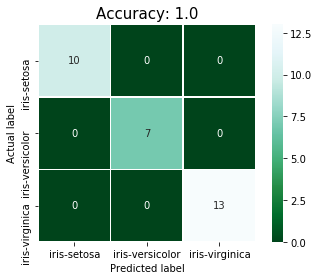

In [27]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

pretty_cm(y_pred_class, y_test_class, ['iris-setosa', 'iris-versicolor', 'iris-virginica'])

The last task we show today is rescaling our data.  Rescaling is especially useful when features differ greatly in magnitude.

Below we apply Min-Max scaling, where all data is scaled to values between 0 and 1.

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(panda_data[panda_data.columns[0:4]])

scaled_data

array([[0.55555556, 0.29166667, 0.66101695, 0.70833333],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.38888889, 0.33333333, 0.59322034, 0.5       ],
       [0.22222222, 0.625     , 0.06779661, 0.08333333],
       [0.86111111, 0.33333333, 0.86440678, 0.75      ],
       [0.94444444, 0.33333333, 0.96610169, 0.79166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.19444444, 0.        , 0.42372881, 0.375     ],
       [0.33333333, 0.16666667, 0.47457627, 0.41666667],
       [0.91666667, 0.41666667, 0.94915254, 0.83333333],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.13888889, 0.58333333, 0.15254237, 0.04166667],
       [0.66666667, 0.41666667, 0.71186441, 0.91666667],
       [0.36111111, 0.29166667, 0.54237288, 0.5       ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.58333333, 0.33333333, 0.77966102, 0.83333333],
       [0.33333333, 0.625     , 0.05084746, 0.04166667],
       [0.33333333, 0.25      ,

Now we again split our data, and retrain our neural network.  We load the our initial neural network weights, so that they can be retrained using our rescaled data.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, bin_y, test_size=0.2)

#Load our weights prior to training.
model.load_weights('model.h5')

#Train model
model.fit(X_train,y_train,epochs=200)

#Get data for assessment
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/200
120/120 [==============================] - 0s 42us/step - loss: 1.0651 - acc: 0.4167
Epoch 2/200
120/120 [==============================] - 0s 50us/step - loss: 1.0586 - acc: 0.4417
Epoch 3/200
120/120 [==============================] - 0s 75us/step - loss: 1.0492 - acc: 0.5083
Epoch 4/200
120/120 [==============================] - 0s 50us/step - loss: 1.0369 - acc: 0.5833
Epoch 5/200
120/120 [==============================] - 0s 58us/step - loss: 1.0253 - acc: 0.6333
Epoch 6/200
120/120 [==============================] - 0s 67us/step - loss: 1.0135 - acc: 0.6667
Epoch 7/200
120/120 [==============================] - 0s 67us/step - loss: 1.0034 - acc: 0.7500
Epoch 8/200
120/120 [==============================] - 0s 67us/step - loss: 0.9916 - acc: 0.8250
Epoch 9/200
120/120 [==============================] - 0s 63us/step - loss: 0.9815 - acc: 0.8083
Epoch 10/200
120/120 [==============================] - 0s 63us/step - loss: 0.9717 - acc: 0.8083
Epoch 11/200
120/120 [=======

120/120 [==============================] - 0s 50us/step - loss: 0.2522 - acc: 0.9667
Epoch 168/200
120/120 [==============================] - 0s 50us/step - loss: 0.2504 - acc: 0.9667
Epoch 169/200
120/120 [==============================] - 0s 50us/step - loss: 0.2489 - acc: 0.9583
Epoch 170/200
120/120 [==============================] - 0s 67us/step - loss: 0.2471 - acc: 0.9583
Epoch 171/200
120/120 [==============================] - 0s 54us/step - loss: 0.2455 - acc: 0.9583
Epoch 172/200
120/120 [==============================] - 0s 63us/step - loss: 0.2439 - acc: 0.9583
Epoch 173/200
120/120 [==============================] - 0s 58us/step - loss: 0.2423 - acc: 0.9583
Epoch 174/200
120/120 [==============================] - 0s 50us/step - loss: 0.2408 - acc: 0.9583
Epoch 175/200
120/120 [==============================] - 0s 50us/step - loss: 0.2394 - acc: 0.9583
Epoch 176/200
120/120 [==============================] - 0s 67us/step - loss: 0.2378 - acc: 0.9583
Epoch 177/200
120/120 [=

Below, we generate a confusion matrix from the results of our test data.

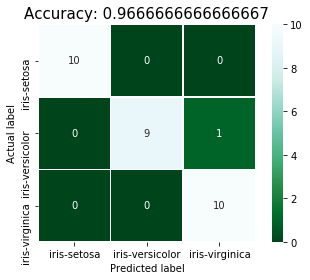

In [30]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

pretty_cm(y_pred_class, y_test_class, ['iris-setosa', 'iris-versicolor', 'iris-virginica'])

In this case, rescaling actually reduced the accuracy.  Rescaling was not necessary, since our inputs were already quite comparable. 

End of Tutorial.